In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import re
import os
import time
df = pd.read_csv("RB_Stats.csv")

In [10]:
df.columns = [c.replace(' ', '') for c in df.columns]

In [11]:
df.columns

Index(['Unnamed:0', 'Player', 'Tm', 'Pos', 'Age', 'G', 'GS', 'Cmp', 'Att',
       'Yds', 'Int', 'Att.1', 'Yds.1', 'Tgt', 'Rec', 'Yds.2', 'Y/R', 'Fumbles',
       'FumblesLost', 'PassingYds', 'PassingTD', 'PassingAtt', 'RushingYds',
       'RushingTD', 'RushingAtt', 'ReceivingYds', 'ReceivingTD',
       'FantasyPoints'],
      dtype='object')

In [14]:
df.drop("Unnamed:0", axis = 1, inplace = True)

In [15]:
df.head()

,Player,Tm,Pos,Age,G,GS,Cmp,Att,Yds,Int,...,FumblesLost,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints
0,LaDainian Tomlinson,SDG,RB,27.0,16.0,16.0,2.0,3.0,20.0,0.0,...,1.0,20.0,2.0,3.0,1815.0,28.0,348.0,508.0,3.0,481.10
1,Christian McCaffrey,CAR,RB,23.0,16.0,16.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,2.0,1387.0,15.0,287.0,1005.0,4.0,469.20
2,Marshall Faulk,STL,RB,27.0,14.0,14.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1359.0,18.0,253.0,830.0,8.0,455.90
3,Priest Holmes,KAN,RB,30.0,16.0,16.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1420.0,27.0,320.0,690.0,0.0,445.00
4,LaDainian Tomlinson,SDG,RB,24.0,16.0,16.0,1.0,1.0,21.0,0.0,...,0.0,21.0,1.0,1.0,1645.0,13.0,313.0,725.0,4.0,443.84


In [16]:
counts_age = df["Age"].value_counts()
counts_age = counts_age.reset_index()
counts_age.columns = ["Age","Count"]
print(counts_age)

     Age  Count
0   24.0   1243
1   25.0   1135
2   23.0   1061
3   26.0    972
4   27.0    794
5   28.0    617
6   22.0    542
7   29.0    472
8   30.0    330
9   31.0    227
10  32.0    139
11  33.0     87
12  21.0     71
13  34.0     50
14  35.0     23
15  36.0     12
16  38.0      3
17  37.0      3
18  39.0      1


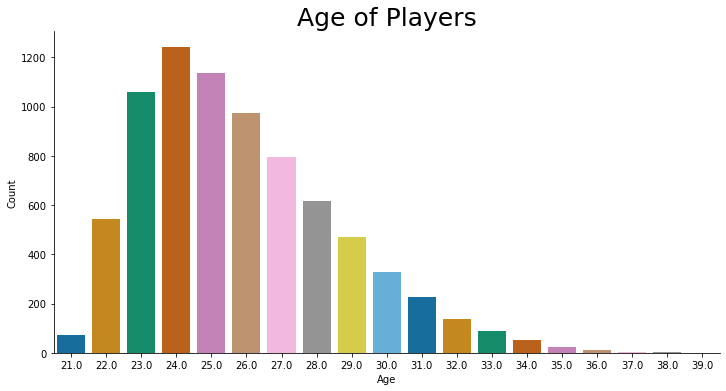

In [17]:
pt = sns.catplot(y = "Count",
            x = "Age", data = counts_age,
           palette="colorblind",height=5, aspect=2, kind="bar");
plt.style.use("ggplot")
plt.title("Age of Players",
          fontsize=25);

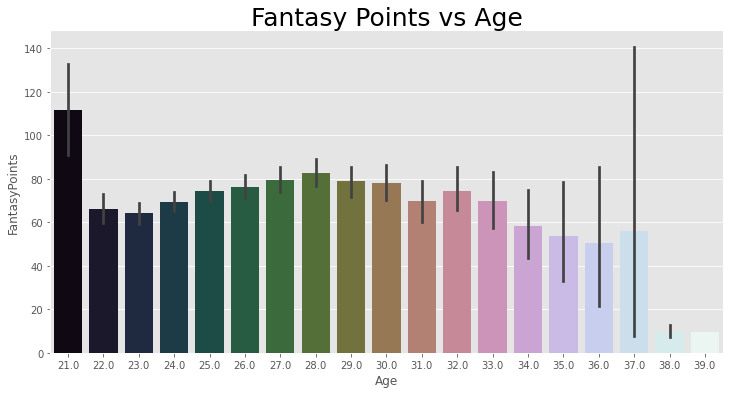

In [18]:
sns.catplot(x="Age", y="FantasyPoints", data=df,
            aspect=2, kind="bar", palette="cubehelix");
plt.style.use("ggplot")
plt.title("Fantasy Points vs Age",
          fontsize=25);

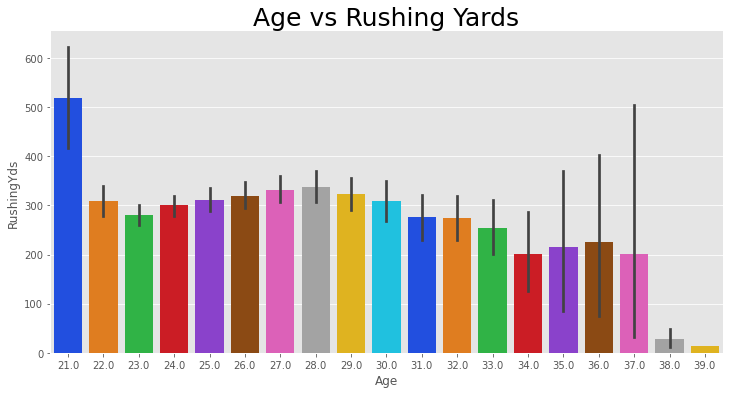

In [19]:
sns.catplot(x="Age", y="RushingYds", data=df, aspect=2, kind="bar",palette="bright");
plt.style.use("ggplot")
plt.title("Age vs Rushing Yards",
          fontsize=25);

In [20]:
counts_rushTD = df["RushingTD"].value_counts()
counts_rushTD = counts_rushTD.reset_index()
counts_rushTD.columns= ["RushingTD","Counts"]
print(counts_rushTD)

    RushingTD  Counts
0         0.0    3400
1         1.0    1304
2         2.0     796
3         3.0     545
4         4.0     418
5         5.0     283
6         6.0     226
7         7.0     213
8         8.0     162
9         9.0     120
10       11.0      67
11       10.0      62
12       12.0      55
13       13.0      44
14       14.0      33
15       15.0      15
16       16.0      11
17       18.0       8
18       17.0       6
19       21.0       5
20       19.0       3
21       27.0       2
22       20.0       1
23       24.0       1
24       25.0       1
25       28.0       1


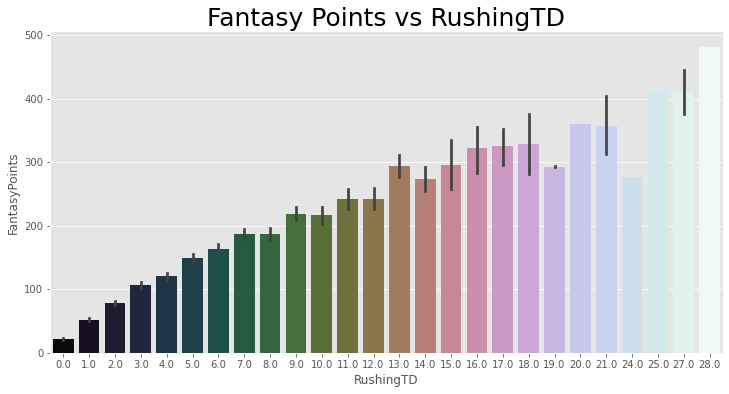

In [21]:
sns.catplot(x="RushingTD", y="FantasyPoints", data=df,
            aspect=2, kind="bar", palette="cubehelix");
plt.style.use("ggplot")
plt.title("Fantasy Points vs RushingTD",
          fontsize=25);

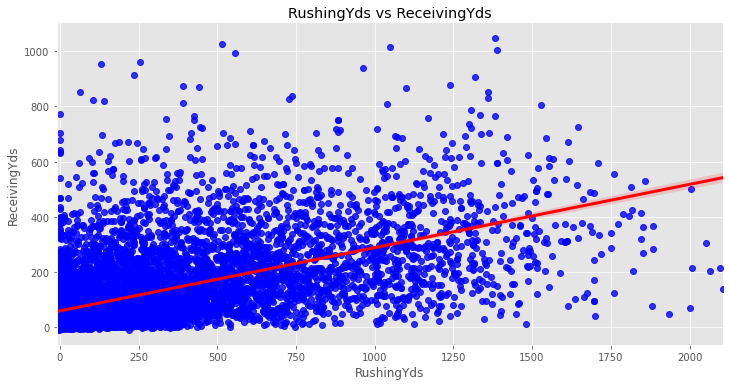

In [26]:
sns.lmplot(x="RushingYds", y="ReceivingYds",data=df,markers="o",
            scatter_kws={"color": "blue"},
         line_kws={"linewidth":3,"color":"red"},aspect=2);
plt.title("RushingYds vs ReceivingYds");

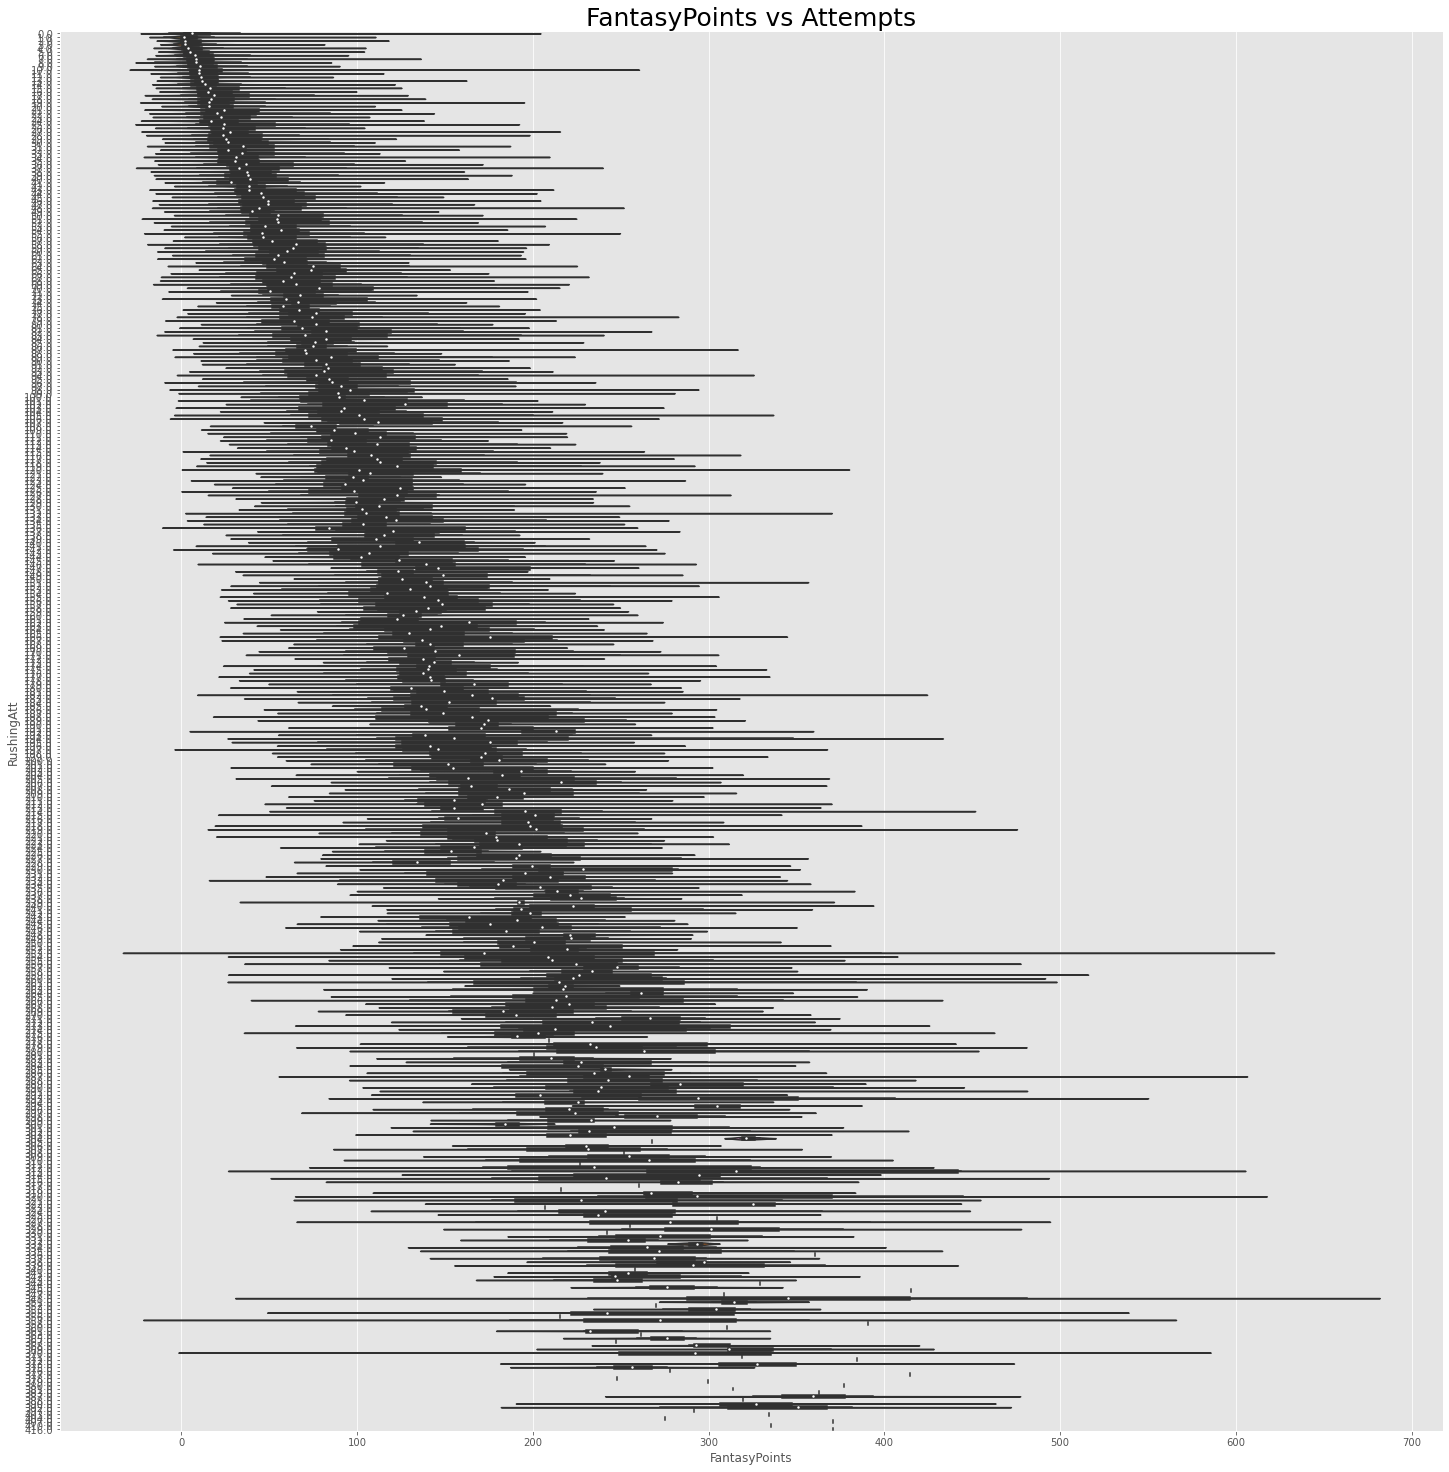

In [28]:
sns.catplot(x="FantasyPoints", y="RushingAtt",data=df,
            orient="h",
            kind="violin",height=20,palette="colorblind");
plt.title("FantasyPoints vs Attempts", fontsize=25);